In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = ".../cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [23]:
from pprint import pprint

In [24]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

In [25]:
firstCity = cities[0]
firstCity

'sept-iles'

In [26]:
 # Build query URL
units = "imperial"
url = f"http://api.openweathermap.org/data/2.5/weather?q={firstCity}&appid={weather_api_key}&units={units}"

url

'http://api.openweathermap.org/data/2.5/weather?q=sept-iles&appid=2ee2e9d3998613d3976081d28563ecc6&units=imperial'

In [27]:
 response = requests.get(url).json()
pprint(response)

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 50.2, 'lon': -66.38},
 'dt': 1595126796,
 'id': 6144312,
 'main': {'feels_like': 65.5,
          'humidity': 93,
          'pressure': 1011,
          'temp': 63.09,
          'temp_max': 64,
          'temp_min': 60.8},
 'name': 'Sept-Îles',
 'sys': {'country': 'CA',
         'id': 1013,
         'sunrise': 1595061367,
         'sunset': 1595118423,
         'type': 1},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 50, 'speed': 2.24}}


In [28]:
response["clouds"]["all"]

20

In [29]:
 lats = []
longs = []
temps = []
humids = []
pressures = []
winds = []
clouds = []

citiesFound = []
counter = 0

In [30]:
for city in cities:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units={units}"
    
    try:
        response = requests.get(url).json()
    
        code = response["cod"]

        if code == 200:  
            citiesFound.append(city)
            lats.append(response["coord"]["lat"])
            longs.append(response["coord"]["lon"])
            temps.append(response["main"]["temp"])
            humids.append(response["main"]["humidity"])
            pressures.append(response["main"]["pressure"])

            winds.append(response["wind"]["speed"])
            clouds.append(response["clouds"]["all"])

        if counter % 50 == 0:
            print(counter)
    
    except Exception as e:
        print(e)
    
    counter += 1
    time.sleep(1)

0
50
100
150
200
250
300
350
400
450
500
550
600


In [31]:
counter

615

In [32]:
 df = pd.DataFrame()
df["cities"] = citiesFound
df["latitude"] = lats
df["longitude"] = longs
df["temperature"] = temps
df["humidity"] = humids
df["pressure"] = pressures
df["wind_speed"] = winds
df["cloudiness"] = clouds

df.head()

cities  latitude  longitude  temperature  humidity  pressure  \
0  sept-iles     50.20     -66.38        63.09        93      1011   
1  busselton    -33.65     115.33        55.27        87      1028   
2     avarua    -21.21    -159.78        73.40        78      1015   
3       tezu     27.92      96.17        76.14        87      1008   
4       poum    -20.23     164.02        71.56        63      1012   

   wind_speed  cloudiness  
0        2.24          20  
1        2.35         100  
2       14.99          79  
3        2.30         100  
4       13.96           3

In [33]:
len(df)

555

In [34]:
mask = df.humidity <= 100
df_sub = df.loc[mask].reset_index(drop=True)

df_sub.head()

cities  latitude  longitude  temperature  humidity  pressure  \
0  sept-iles     50.20     -66.38        63.09        93      1011   
1  busselton    -33.65     115.33        55.27        87      1028   
2     avarua    -21.21    -159.78        73.40        78      1015   
3       tezu     27.92      96.17        76.14        87      1008   
4       poum    -20.23     164.02        71.56        63      1012   

   wind_speed  cloudiness  
0        2.24          20  
1        2.35         100  
2       14.99          79  
3        2.30         100  
4       13.96           3

In [35]:
df_sub.to_csv("weatherData.csv", index=False)

In [36]:
 df = pd.read_csv("weatherData.csv")

df.head()

cities  latitude  longitude  temperature  humidity  pressure  \
0  sept-iles     50.20     -66.38        63.09        93      1011   
1  busselton    -33.65     115.33        55.27        87      1028   
2     avarua    -21.21    -159.78        73.40        78      1015   
3       tezu     27.92      96.17        76.14        87      1008   
4       poum    -20.23     164.02        71.56        63      1012   

   wind_speed  cloudiness  
0        2.24          20  
1        2.35         100  
2       14.99          79  
3        2.30         100  
4       13.96           3

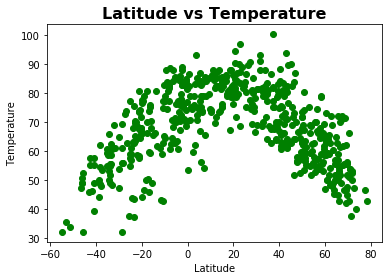

In [37]:
 plt.scatter(df.latitude, df.temperature, color="green")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude vs Temperature", fontsize=16, fontweight="bold")
plt.show()

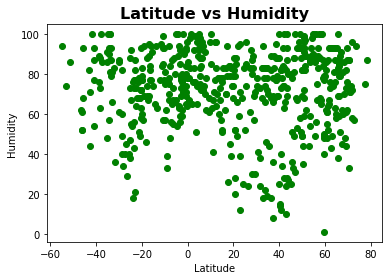

In [38]:
plt.scatter(df.latitude, df.humidity, color="green")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity", fontsize=16, fontweight="bold")
plt.show()

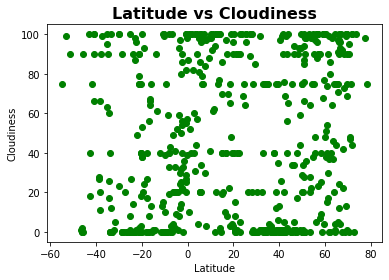

In [39]:
plt.scatter(df.latitude, df.cloudiness, color="green")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness", fontsize=16, fontweight="bold")
plt.show()

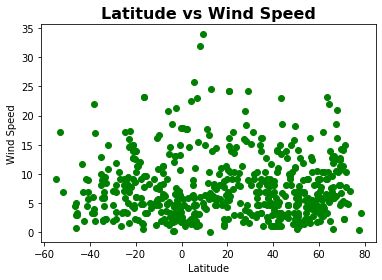

In [40]:
plt.scatter(df.latitude, df.wind_speed, color="green")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed", fontsize=16, fontweight="bold")
plt.show()

In [41]:
northernHemi_mask = df.latitude >= 0
df_north = df.loc[northernHemi_mask].reset_index(drop=True)

df_north.head()

cities  latitude  longitude  temperature  humidity  pressure  \
0    sept-iles     50.20     -66.38        63.09        93      1011   
1         tezu     27.92      96.17        76.14        87      1008   
2  yellowknife     62.46    -114.35        72.00        43      1010   
3       narsaq     60.92     -46.05        50.00        61      1016   
4    road town     18.42     -64.62        81.34        84      1013   

   wind_speed  cloudiness  
0        2.24          20  
1        2.30         100  
2       10.29          40  
3        5.82          74  
4        1.01           3

In [42]:
southernHemi_mask = df.latitude < 0
df_south = df.loc[southernHemi_mask].reset_index(drop=True)

df_south.head()

cities  latitude  longitude  temperature  humidity  pressure  \
0    busselton    -33.65     115.33        55.27        87      1028   
1       avarua    -21.21    -159.78        73.40        78      1015   
2         poum    -20.23     164.02        71.56        63      1012   
3     luderitz    -26.65      15.16        62.60        29      1018   
4  chake chake     -5.25      39.77        76.28        67      1016   

   wind_speed  cloudiness  
0        2.35         100  
1       14.99          79  
2       13.96           3  
3        1.12           0  
4       14.54           9

In [43]:
 import seaborn as sn

In [45]:
north_corrs = df_north.corr()
north_corrs

latitude  longitude  temperature  humidity  pressure  wind_speed  \
latitude     1.000000   0.005133    -0.697503 -0.018632  0.029589   -0.059016   
longitude    0.005133   1.000000     0.075412 -0.060472 -0.142319   -0.040676   
temperature -0.697503   0.075412     1.000000 -0.382167 -0.070136    0.076228   
humidity    -0.018632  -0.060472    -0.382167  1.000000  0.002330   -0.139273   
pressure     0.029589  -0.142319    -0.070136  0.002330  1.000000   -0.027457   
wind_speed  -0.059016  -0.040676     0.076228 -0.139273 -0.027457    1.000000   
cloudiness  -0.008363   0.240320    -0.146322  0.250676 -0.141962    0.108274   

             cloudiness  
latitude      -0.008363  
longitude      0.240320  
temperature   -0.146322  
humidity       0.250676  
pressure      -0.141962  
wind_speed     0.108274  
cloudiness     1.000000

In [46]:
south_corrs = df_south.corr()
south_corrs

latitude  longitude  temperature  humidity  pressure  wind_speed  \
latitude     1.000000  -0.022988     0.722999  0.040095 -0.206399   -0.017651   
longitude   -0.022988   1.000000     0.166554 -0.360412 -0.070377   -0.117548   
temperature  0.722999   0.166554     1.000000 -0.149965 -0.487913    0.108800   
humidity     0.040095  -0.360412    -0.149965  1.000000  0.021062    0.036571   
pressure    -0.206399  -0.070377    -0.487913  0.021062  1.000000   -0.045584   
wind_speed  -0.017651  -0.117548     0.108800  0.036571 -0.045584    1.000000   
cloudiness  -0.040616  -0.114254     0.065576  0.271736 -0.270365    0.199745   

             cloudiness  
latitude      -0.040616  
longitude     -0.114254  
temperature    0.065576  
humidity       0.271736  
pressure      -0.270365  
wind_speed     0.199745  
cloudiness     1.000000